In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay
import openpyxl

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [ ]:
df_test = pd.read_excel('fraudTest.xlsx')

In [ ]:
df.dropna(axis=0, how='any',inplace=True)

In [47]:
df.drop(columns=['ID','trans_num'],inplace=True)

In [48]:
df.head()

,Time,Card Number,merchant,category,Amount,firstName,lastName,is_fraud
0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0.0
1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0.0
2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0.0
3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0.0
4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0.0


In [49]:
df.dropna(axis=0, how='any',inplace=True)

In [50]:
df.dtypes

Time            object
Card Number    float64
merchant        object
category        object
Amount         float64
firstName       object
lastName        object
is_fraud       float64
dtype: object

In [51]:
df['Time'] = pd.to_datetime(df['Time'])

In [52]:
df['Name'] = df['firstName'] + ' ' + df['lastName']

In [53]:
df['Time:year'] = df['Time'].dt.year
df['Time:month'] = df['Time'].dt.month
df['Time:day'] = df['Time'].dt.day
df['Time:day_of_week'] = df['Time'].dt.day_of_week

In [83]:
df.dtypes

Card Number         float64
merchant              int32
category              int32
Amount              float64
is_fraud            float64
Name                  int32
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
dtype: object

In [54]:
df.drop(columns=['Time'], inplace=True)

In [59]:
df.drop(columns=['firstName','lastName'], inplace=True)

In [60]:
df.shape

(1002103, 10)

In [61]:
df.dtypes

Card Number         float64
merchant             object
category             object
Amount              float64
is_fraud            float64
Name                 object
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
dtype: object

In [63]:
le = preprocessing.LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])

In [65]:
df['category'] = le.fit_transform(df['category'])
df['Name'] = le.fit_transform(df['Name'])

In [67]:
x_train = df.drop(columns='is_fraud',axis=1)
y_train = df['is_fraud']

In [68]:
x_train.shape

(1002103, 9)

In [82]:
df_test = pd.read_excel('fraudTest.xlsx')

In [71]:
df_test.isnull().sum()

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64

In [84]:
df_test['Time'] = pd.to_datetime(df_test['Time'])

In [85]:
df_test['Name'] = df_test['firstName'] + ' ' + df_test['lastName']

In [86]:
df_test['Time:year'] = df_test['Time'].dt.year
df_test['Time:month'] = df_test['Time'].dt.month
df_test['Time:day'] = df_test['Time'].dt.day
df_test['Time:day_of_week'] = df_test['Time'].dt.day_of_week

In [87]:
df_test.drop(columns=['ID','trans_num','firstName','lastName','Time'], inplace=True)

In [88]:
df_test['merchant'] = le.fit_transform(df_test['merchant'])
df_test['category'] = le.fit_transform(df_test['category'])
df_test['Name'] = le.fit_transform(df_test['Name'])

In [89]:
x_test = df_test.drop(columns='is_fraud',axis=1)
y_test = df_test['is_fraud']

In [90]:
df_test.dtypes

Card Number           int64
merchant              int32
category              int32
Amount              float64
is_fraud              int64
Name                  int32
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
dtype: object

In [91]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [92]:
predictions = LR.predict(x_test)

In [93]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)

print(LR_Accuracy_Score)

0.9961401355721147


In [94]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
predictions = Tree.predict(x_test)

In [103]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_Jaccard_Index = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)
Tree_Confusion_Matrix = confusion_matrix(y_test,predictions)
Tree_Recall = recall_score(y_test,predictions)
Tree_Precision = precision_score(y_test,predictions)

print(Tree_Recall)
print(Tree_Precision)
print(Tree_Accuracy_Score)
print(Tree_Jaccard_Index)
print(Tree_F1_Score)
print(Tree_Confusion_Matrix)

0.5123543123543124
0.43490304709141275
0.9955481097461127
0.3075846627483907
0.4704623287671233
[[552146   1428]
 [  1046   1099]]


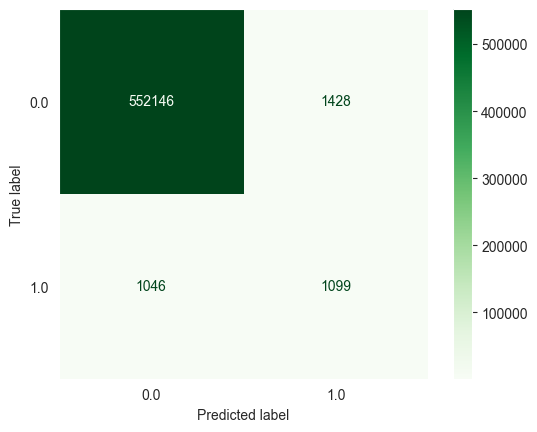

In [118]:
fig, ax = plt.subplots()
ax.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=Tree_Confusion_Matrix,display_labels=Tree.classes_)
disp.plot(cmap='Greens',ax=ax)
plt.show()